In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 16 12:57:57 2017
@author: Rajesh Jakhotia
@company: K2 Analytics Finishing School Pvt. Ltd.
@website: k2analytics.co.in
@email: ar.jakhotia@k2analytics.co.in
"""

'\nCreated on Sun Jul 16 12:57:57 2017\n@author: Rajesh Jakhotia\n@company: K2 Analytics Finishing School Pvt. Ltd.\n@website: k2analytics.co.in\n@email: ar.jakhotia@k2analytics.co.in\n'

In [2]:
##Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir("d:/K2Analytics/Datafile") 
os.getcwd()
LR_DF = pd.read_csv("LR_DF.csv")

In [4]:
LR_DF.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9.0
1,C10,1,41,M,84370.59,PROF,14,41-45,843,9.0
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26.0
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19.0
4,C10000,0,43,M,97100.48,NaN,3,41-45,397,8.0


In [5]:
#Summary statistics
LR_DF.describe(include = "all")
##LR_DF.dropna().describe()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
count,20000,20000.000000,20000.000000,20000,2.000000e+04,15360,20000.00000,20000,20000.000000,19000.000000
unique,20000,NaN,NaN,3,NaN,4,NaN,7,NaN,NaN
top,C12986,NaN,NaN,M,NaN,SAL,NaN,31-35,NaN,NaN
freq,1,NaN,NaN,14279,NaN,5908,NaN,3488,NaN,NaN
mean,NaN,0.044400,38.396200,NaN,1.461813e+05,NaN,16.61795,NaN,557.136050,15.199737
std,NaN,0.205987,9.600179,NaN,1.698125e+05,NaN,12.96995,NaN,260.521453,9.239180
min,NaN,0.000000,21.000000,NaN,0.000000e+00,NaN,0.00000,NaN,100.000000,0.000000
25%,NaN,0.000000,30.000000,NaN,2.373692e+04,NaN,7.00000,NaN,333.000000,7.000000
50%,NaN,0.000000,38.000000,NaN,7.975574e+04,NaN,13.00000,NaN,560.000000,15.000000
75%,NaN,0.000000,47.000000,NaN,2.173106e+05,NaN,21.00000,NaN,784.000000,23.000000


In [6]:
#Getting percentile distribution
LR_DF["Age"].quantile([0.01,0.05,0.1,
     0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01    21.0
0.05    24.0
0.10    26.0
0.25    30.0
0.50    38.0
0.75    47.0
0.90    52.0
0.95    54.0
0.99    55.0
1.00    55.0
Name: Age, dtype: float64

In [7]:
#Getting percentile distribution for all numeric variables
##LR_DF.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]) this function does not work on missing
np.nanpercentile(LR_DF["Holding_Period"], np.arange(0, 101, 10))

array([  0.,   2.,   6.,   9.,  12.,  15.,  18.,  21.,  25.,  28.,  31.])

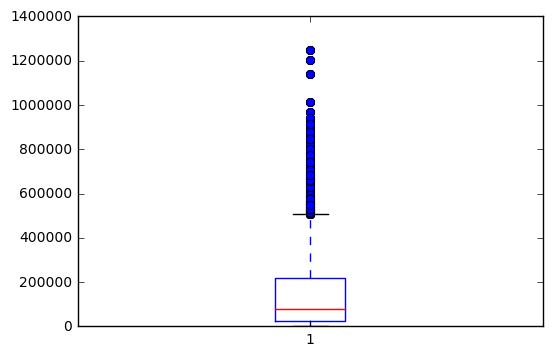

In [8]:
#Capping and Flooring
plt.boxplot(LR_DF["Balance"],0,'o')
plt.show()

In [9]:
##### Outlier Function
def outlier_treatment(df, col_name):
    df = df.copy()
    x = df[col_name]
    median, std = x.median(), x.std()
    upper_outlier_value = median + 2 * std
    lower_outlier_value = median - 2 * std

    upper_outlier_row_index = (x - median) > 2 * std
    lower_outlier_row_index = (median - x) > 2 * std

    x[upper_outlier_row_index] = upper_outlier_value
    x[lower_outlier_row_index] = lower_outlier_value
    return x

LR_DF["Bal_cap"] = outlier_treatment(df = LR_DF, col_name = "Balance")
 


#LR_DF["Bal_cap"]=LR_DF["Balance"].map(lambda x: 560000 if x>560000 else x)

LR_DF["Bal_cap"].describe()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count     20000.000000
mean     133034.464739
std      133973.784371
min           0.000000
25%       23736.915000
50%       79755.745000
75%      217310.632500
max      419380.799894
Name: Bal_cap, dtype: float64

In [10]:
LR_DF['decile'] = pd.qcut(LR_DF['Holding_Period'], 10, labels=False)

Rrate =  LR_DF.fillna(-1).groupby('decile').apply(lambda x: pd.Series([
        np.min(x['Holding_Period']),
        np.max(x['Holding_Period']),
        np.mean(x['Holding_Period']),
        np.size(x['Holding_Period']),
        np.sum(x['Target']),
        np.size(x['Target'][x['Target']==0]),
        ],
        index=(["min_HP","max_HP","avg_HP",
        "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()

Rrate["rrate"]=Rrate["cnt_resp"]*100/Rrate["cnt"]

In [11]:
Rrate

,decile,min_HP,max_HP,avg_HP,cnt,cnt_resp,cnt_non_resp,rrate
0,-1.0,-1.0,-1.0,-1.000000,1000.0,35.0,965.0,3.500000
1,0.0,0.0,2.0,0.993694,1903.0,175.0,1728.0,9.196006
2,1.0,3.0,6.0,4.524664,2453.0,185.0,2268.0,7.541786
3,2.0,7.0,9.0,8.004442,1801.0,113.0,1688.0,6.274292
4,3.0,10.0,12.0,10.979237,1782.0,87.0,1695.0,4.882155
5,4.0,13.0,15.0,14.039539,1821.0,78.0,1743.0,4.283361
6,5.0,16.0,18.0,17.001073,1864.0,73.0,1791.0,3.916309
7,6.0,19.0,21.0,19.992970,1707.0,34.0,1673.0,1.991798
8,7.0,22.0,25.0,23.532358,2256.0,54.0,2202.0,2.393617
9,8.0,26.0,28.0,27.014732,1697.0,28.0,1669.0,1.649971


In [12]:
LR_DF["HP_Imputed"]=LR_DF["Holding_Period"].fillna(18)
LR_DF["HP_Imputed"].describe()

count    20000.000000
mean        15.339750
std          9.025885
min          0.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: HP_Imputed, dtype: float64

In [13]:
## Drop the decile column
LR_DF.drop(['decile'], axis = 1, inplace = True)

In [14]:
#Missing Value Imputation for Occupation
ctab = pd.crosstab(LR_DF["Occupation"].fillna(''),LR_DF["Target"] )
ctab['RRate'] = ctab[1] *100 / (ctab[1] + ctab[0])
ctab

Target,0,1,RRate
Occupation,,,
,4432,208,4.482759
PROF,5259,221,4.032847
SAL,5749,159,2.691266
SELF-EMP,2982,290,8.863081
SENP,690,10,1.428571


In [15]:
LR_DF["Occu_Imputed"]=LR_DF.Occupation.fillna("MISSING")
LR_DF["Occu_Imputed"].value_counts()

SAL         5908
PROF        5480
MISSING     4640
SELF-EMP    3272
SENP         700
Name: Occu_Imputed, dtype: int64

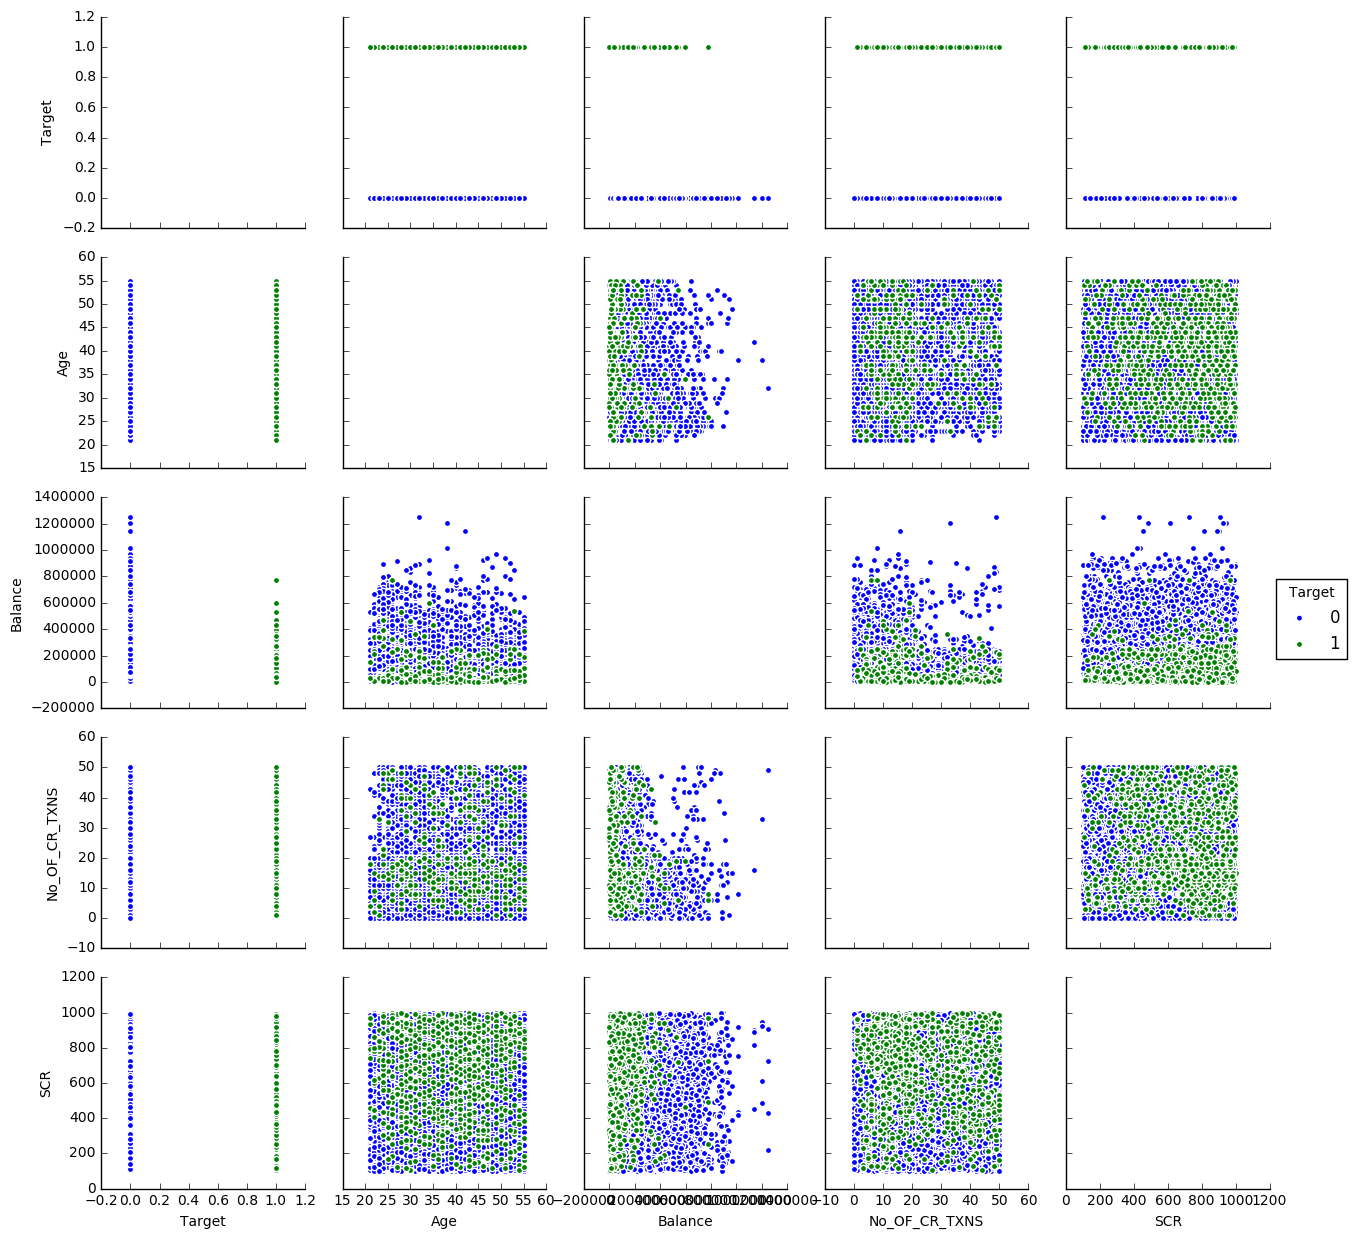

In [16]:
import seaborn as sns
sns.pairplot(LR_DF.iloc[:,1:9], hue = "Target", diag_kind="auto")

In [17]:
## Information Value
exec(open("D:/K2Analytics/Python/Logistic_Regression/iv_function.py").read())
iv = information_value(df = LR_DF.iloc[:,1:],target = LR_DF.Target)
iv

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,VAR_NAME,IV,BINS
0,No_OF_CR_TXNS,0.379058,9
1,Holding_Period,0.349119,13
2,HP_Imputed,0.349017,11
3,Bal_cap,0.296563,7
4,Balance,0.296563,7
5,SCR,0.272628,9
6,Occu_Imputed,0.220740,5
7,Occupation,0.220740,5
8,AGE_BKT,0.095657,7
9,Gender,0.032927,3


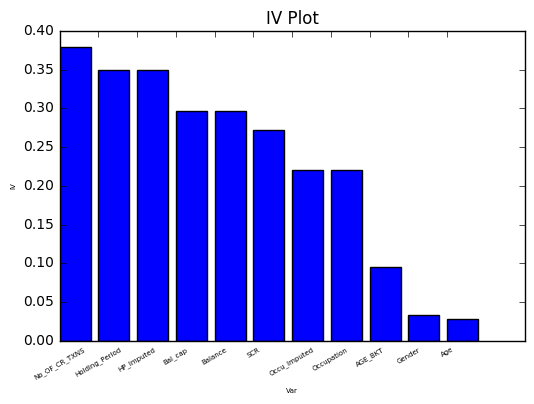

In [18]:
## Plotting the IV
index = np.arange(len(iv.VAR_NAME))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(iv.VAR_NAME))
    plt.bar(index, iv.IV)
    plt.xlabel('Var', fontsize=5)
    plt.ylabel('IV', fontsize=5)
    plt.xticks(index, iv.VAR_NAME, fontsize=5, rotation=30)
    plt.title('IV Plot')
    plt.show()

plot_bar_x()  

In [19]:
## Visualization Code
ai = LR_DF.drop('Target',axis=1).select_dtypes([np.number]).columns
for i in ai:
    print(i)
    fn_biz_viz(LR_DF,i,"Target", 
               r"D:\K2Analytics\Python\Logistic_Regression\Visualization")

Age
Balance
No_OF_CR_TXNS
SCR
Holding_Period
Bal_cap
HP_Imputed


In [20]:
## Transforming Age Variable
LR_DF["DV_Age"]=LR_DF["Age"].map(lambda
         x: 43-(x-43) if x>43 else x)


In [21]:
## Other approach of writing the above code
LR_DF["dv_age"] = [y if y < 43 else (43 - (y - 43)) for y in LR_DF["Age"]]
LR_DF["dv_age"] = np.where(LR_DF["Age"] < 43, LR_DF["Age"], 
     43 - (LR_DF["Age"] - 43))

In [22]:
#Model development
#spliting into development, validation and hold-out sample
mydata = LR_DF.copy()
mydata_dev, mydata_val, mydata_holdout = np.split(
        mydata.sample(frac=1, random_state=1212), 
        [int(.5*len(mydata)), 
         int(.8*len(mydata))]
        )

(len(mydata_dev), len(mydata_val), len(mydata_holdout))


(10000, 6000, 4000)

In [23]:
#########################################################

############# Other approach of Sampling  ###############

#########################################################
#from sklearn.model_selection import train_test_split
#array = LR_DF.values
#X = array[:,2:] # select all rows and 2nd column index onwards which are the attributes
#Y = array[:,1]   # select all rows and the 1st column index which is the Target 1/0 for response
#test_size = 0.30 # taking 70:30 training and test set
#seed = 7  # Random numbmer seeding for reapeatability of the code
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
#type(X_train)

In [24]:
print(round(sum(mydata_dev.Target)*100/len(mydata_dev),1),
    round(sum(mydata_val.Target)*100/len(mydata_val),1),
    round(sum(mydata_holdout.Target)*100/len(mydata_holdout),1))


4.3 4.8 4.2


In [25]:
#Importing the required Packages
import statsmodels.formula.api as sm
import statsmodels.api
## Running one variable Logistic Regression
mylogit = sm.glm(formula = "Target~ Age" , data = mydata_dev,
                    family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1784.3
Date:                Thu, 11 Apr 2019   Deviance:                       3568.5
Time:                        18:25:39   Pearson chi2:                 9.99e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4643      0.206    -16.812      0.000      -3.868      -3.060
Age            0.0096      0.005      1.875      0.061      -0.000       0.020
==============================================================================
"""

In [26]:
mylogit = sm.glm(formula = "Target~ DV_Age" , data = mydata_dev,
                    family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1768.8
Date:                Thu, 11 Apr 2019   Deviance:                       3537.5
Time:                        18:25:40   Pearson chi2:                 1.00e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9389      0.332    -14.894      0.000      -5.589      -4.289
DV_Age         0.0532      0.009      5.745      0.000       0.035       0.071
==============================================================================
"""

In [27]:
## Running regression with all the variables
mylogit = sm.glm(formula = """Target~ DV_Age + Gender + SCR + Bal_cap 
        + No_OF_CR_TXNS + Occu_Imputed + HP_Imputed""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1499.2
Date:                Thu, 11 Apr 2019   Deviance:                       2998.5
Time:                        18:25:40   Pearson chi2:                 1.15e+04
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.5177      0.410    -11.022      0.000      -5.321      -3.714
Gender[T.M]                  0.2328      0.137      1.699      0.089      -0.036       0.501
Gender[T.O]                 -0.2778      0.553     -0.503      0.615      -1.361       0.806
Occu_Imputed[T.PROF]        -0.8595      0.157     -5.482      0.000      -1.167      -0.552
Occu_Imputed[T.SAL]         -1.4659      0.172     -8.528      0.000      -1.803      -1.129
Occu_Imputed[T.SELF-EMP]     0.1334      0.146      0.913      0.361      -0.153       0.420
Occu_Imputed[T.SENP]        -1.6498      0.435     -3.789      0.000      -2.503      -0.796
DV_Age                       0.0335      0.010      3.362      0.001       0.014       0.053
SCR                          0.0019      0.000      8.911      0.000       0.001       0.002
Bal_cap                  -4.235e-06   5.61e-07     -7.549      0.000   -5.33e-06   -3.14e-06
No_OF_CR_TXNS                0.0403      0.004     10.348      0.000       0.033       0.048
HP_Imputed                  -0.0630      0.006    -10.387      0.000      -0.075      -0.051
============================================================================================
"""

In [28]:
## Dropping Gender Variable
mylogit = sm.glm(formula = """Target~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + Occu_Imputed + HP_Imputed""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.2
Date:                Thu, 11 Apr 2019   Deviance:                       3002.4
Time:                        18:25:40   Pearson chi2:                 1.13e+04
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.3991      0.402    -10.938      0.000      -5.187      -3.611
Occu_Imputed[T.PROF]        -0.8333      0.156     -5.357      0.000      -1.138      -0.528
Occu_Imputed[T.SAL]         -1.4167      0.170     -8.342      0.000      -1.750      -1.084
Occu_Imputed[T.SELF-EMP]     0.1667      0.144      1.154      0.248      -0.116       0.450
Occu_Imputed[T.SENP]        -1.6272      0.435     -3.744      0.000      -2.479      -0.775
DV_Age                       0.0340      0.010      3.422      0.001       0.015       0.053
SCR                          0.0019      0.000      8.919      0.000       0.001       0.002
Bal_cap                  -4.292e-06   5.59e-07     -7.684      0.000   -5.39e-06    -3.2e-06
No_OF_CR_TXNS                0.0414      0.004     10.820      0.000       0.034       0.049
HP_Imputed                  -0.0634      0.006    -10.460      0.000      -0.075      -0.052
============================================================================================
"""

In [29]:
## Transforming Occupation Variable
ctab = pd.crosstab(mydata_dev["Occupation"].fillna(''),mydata_dev["Target"] )
ctab['RRate'] = ctab[1] *100 / (ctab[1] + ctab[0])
ctab

Target,0,1,RRate
Occupation,,,
,2241,107,4.557070
PROF,2641,99,3.613139
SAL,2873,78,2.643172
SELF-EMP,1466,144,8.944099
SENP,345,6,1.709402


In [30]:
mydata_dev["occ_recat"]=mydata_dev["Occupation"].map(lambda
         x: "PROF_MISSING" if (pd.isnull(x) or x == "PROF")
         else ("SAL_SENP" if (x == "SAL" or x == "SENP")
         else "SELF-EMP"))
mydata_dev['occ_recat'].value_counts()


PROF_MISSING    5088
SAL_SENP        3302
SELF-EMP        1610
Name: occ_recat, dtype: int64

In [31]:
################################################################

############# Other style of coding is given below #############

################################################################
#def occ_function (row):
#    if (pd.isnull(row['Occupation']) or row['Occupation'] == "PROF"):
#        return "PROF_MISSING"
#    elif (row['Occupation'] == "SAL" or row['Occupation'] == "SENP"):
#        return "SAL_SENP" 
#    else: return row['Occupation']

#mydata_dev['occ_recat2'] = mydata_dev.apply (
#        lambda row: occ_function(row),axis=1)
#mydata_dev['occ_recat2'].value_counts()

In [32]:
mylogit = sm.glm(formula = """Target ~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + occ_recat + HP_Imputed""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1515.8
Date:                Thu, 11 Apr 2019   Deviance:                       3031.5
Time:                        18:25:45   Pearson chi2:                 1.12e+04
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.7553      0.399    -11.910      0.000      -5.538      -3.973
occ_recat[T.SAL_SENP]    -0.9057      0.138     -6.547      0.000      -1.177      -0.635
occ_recat[T.SELF-EMP]     0.6553      0.118      5.531      0.000       0.423       0.888
DV_Age                    0.0328      0.010      3.299      0.001       0.013       0.052
SCR                       0.0019      0.000      9.018      0.000       0.001       0.002
Bal_cap               -4.035e-06   5.52e-07     -7.304      0.000   -5.12e-06   -2.95e-06
No_OF_CR_TXNS             0.0359      0.004     10.005      0.000       0.029       0.043
HP_Imputed               -0.0632      0.006    -10.437      0.000      -0.075      -0.051
=========================================================================================
"""

## Weight of Evidence

In [33]:
#Missing Value Imputation for Occupation
ctab = pd.crosstab(mydata_dev["Occu_Imputed"].fillna(''),LR_DF["Target"] )
ctab['RRate'] = ctab[1] *100 / (ctab[1] + ctab[0])
ctab

Target,0,1,RRate
Occu_Imputed,,,
MISSING,2241,107,4.557070
PROF,2641,99,3.613139
SAL,2873,78,2.643172
SELF-EMP,1466,144,8.944099
SENP,345,6,1.709402


In [34]:


mydata_dev["occ_woe"]=mydata_dev["Occu_Imputed"].map(lambda
         x: -5.11 if (x == "MISSING")
         else (19.09 if (x == "PROF")
             else (51.35 if (x == "SAL")
                 else (-77.24 if (x == "SELF-EMP")
                     else 95.89))))

mydata_dev.head(10)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period,Bal_cap,HP_Imputed,Occu_Imputed,decile,DV_Age,dv_age,occ_recat,occ_woe
15453,C5906,0,25,M,93784.79,SAL,13,<25,408,21.0,93784.790000,21.0,SAL,6,25,25,SAL_SENP,51.35
19694,C9723,0,24,F,525990.53,NaN,12,<25,811,12.0,419380.799894,12.0,MISSING,3,24,24,PROF_MISSING,-5.11
16097,C6486,0,24,M,33556.95,SAL,46,<25,260,16.0,33556.950000,16.0,SAL,4,24,24,SAL_SENP,51.35
18828,C8944,0,41,F,42073.83,SENP,8,41-45,222,18.0,42073.830000,18.0,SENP,5,41,41,SAL_SENP,95.89
3011,C12708,0,51,M,15643.21,PROF,9,>50,876,14.0,15643.210000,14.0,PROF,4,35,35,PROF_MISSING,19.09
9770,C18792,0,23,F,46096.20,SAL,4,<25,532,29.0,46096.200000,29.0,SAL,9,23,23,SAL_SENP,51.35
2126,C11911,0,46,M,225555.00,SENP,10,46-50,269,29.0,225555.000000,29.0,SENP,9,40,40,SAL_SENP,95.89
18366,C8528,0,41,M,89195.07,NaN,17,41-45,228,29.0,89195.070000,29.0,MISSING,9,41,41,PROF_MISSING,-5.11
15333,C5799,1,52,M,7402.97,SELF-EMP,47,>50,763,1.0,7402.970000,1.0,SELF-EMP,0,34,34,SELF-EMP,-77.24
224,C102,0,49,F,104133.75,PROF,34,46-50,676,26.0,104133.750000,26.0,PROF,8,37,37,PROF_MISSING,19.09


In [35]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Target ~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + occ_recat + HP_Imputed""",mydata_dev)
vif     

,Variable,VIF
0,Intercept,51.6
1,occ_recat[T.SAL_SENP],1.2
2,occ_recat[T.SELF-EMP],1.1
3,DV_Age,1.0
4,SCR,1.0
5,Bal_cap,1.1
6,No_OF_CR_TXNS,1.1
7,HP_Imputed,1.0


In [36]:
## Predicting Probabilities
mydata_dev["prob"] = mylogit.predict(mydata_dev)

In [37]:
mydata_dev['decile']=pd.qcut(mydata_dev.prob, 10, labels=False)
## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)


RRate = Response_Rate(mydata_dev,"prob","Target")
RRate


,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9,0.103423,0.574147,0.181451,1000.0,197.0,803.0,19.7,197.0,803.0,45.39,8.39,37.00
8,8,0.063079,0.103409,0.080152,1000.0,72.0,928.0,7.2,269.0,1731.0,61.98,18.10,43.88
7,7,0.043706,0.063068,0.052276,1000.0,39.0,961.0,3.9,308.0,2692.0,70.97,28.14,42.83
6,6,0.031733,0.043704,0.037194,1000.0,35.0,965.0,3.5,343.0,3657.0,79.03,38.23,40.80
5,5,0.023493,0.031713,0.027393,1000.0,23.0,977.0,2.3,366.0,4634.0,84.33,48.44,35.89
4,4,0.017270,0.023483,0.020308,1000.0,27.0,973.0,2.7,393.0,5607.0,90.55,58.61,31.94
3,3,0.012529,0.017269,0.014800,1000.0,12.0,988.0,1.2,405.0,6595.0,93.32,68.94,24.38
2,2,0.008574,0.012527,0.010494,1000.0,11.0,989.0,1.1,416.0,7584.0,95.85,79.28,16.57
1,1,0.004969,0.008571,0.006736,1000.0,13.0,987.0,1.3,429.0,8571.0,98.85,89.60,9.25
0,0,0.000411,0.004961,0.003196,1000.0,5.0,995.0,0.5,434.0,9566.0,100.00,100.00,0.00


In [38]:
## Classification
mydata_dev.prob.quantile(
  [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

mydata_dev["class"] = mydata_dev["prob"].map(
        lambda x: 1 if x > mydata_dev.prob.quantile(0.956) else 0)

In [39]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
con_matrix = (
    {"conf_matx": confusion_matrix(mydata_dev.Target,mydata_dev["class"]),
     "accuracy": accuracy_score(mydata_dev.Target,mydata_dev["class"])
    })

print("confusion matrix \n" , con_matrix["conf_matx"], 
      "\n\nclassification accuracy ", con_matrix["accuracy"]
      )


confusion matrix 
 [[9248  318]
 [ 312  122]] 

classification accuracy  0.937


In [40]:
## Predicting Probabilities
mydata_holdout["occ_recat"]=mydata_holdout["Occupation"].map(lambda
         x: "PROF_MISSING" if (pd.isnull(x) or x == "PROF")
         else ("SAL_SENP" if (x == "SAL" or x == "SENP")
         else "SELF-EMP"))
mydata_holdout['occ_recat'].value_counts()

mydata_holdout["prob"] = mylogit.predict(mydata_holdout)

In [41]:
pd.qcut(mydata_holdout.prob, 10, labels=False)

5191     1
16466    4
14812    3
14188    7
16955    8
2748     3
13845    2
6277     5
5950     8
6917     9
6242     8
10825    5
1397     0
12189    0
17494    7
19879    3
6458     1
14648    2
16773    1
18457    7
7957     0
4517     5
9117     5
17074    9
13720    6
9879     5
8075     1
10676    1
5995     6
100      7
        ..
790      5
10630    6
18744    6
6977     7
9830     0
4608     0
4142     5
8038     5
18877    0
17455    8
14203    0
3666     7
8368     0
17992    2
5101     9
18539    2
4883     8
7764     6
5393     2
17806    0
6590     3
10023    3
17380    1
3026     4
18025    9
3213     6
17509    1
19010    2
1690     4
9352     1
Name: prob, Length: 4000, dtype: int64

In [42]:
## Classification

mydata_holdout["class"] = mydata_holdout["prob"].map(
        lambda x: 1 if x > mydata_dev.prob.quantile(0.956) else 0)

h_con_matrix = (
    {"conf_matx": confusion_matrix(mydata_holdout["Target"],mydata_holdout["class"]),
     "accuracy": accuracy_score(mydata_holdout.Target,mydata_holdout["class"])
    })

print("confusion matrix \n" , h_con_matrix["conf_matx"], 
      "\n\nclassification accuracy ", h_con_matrix["accuracy"]
      )

confusion matrix 
 [[3686  148]
 [ 106   60]] 

classification accuracy  0.9365


In [43]:
mydata_holdout['decile']=pd.qcut(mydata_holdout.prob, 10, labels=False)
h_RRate = Response_Rate(mydata_holdout,"prob","Target")
h_RRate

,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9,0.105363,0.577134,0.190614,400.0,81.0,319.0,20.25,81.0,319.0,48.80,8.32,40.48
8,8,0.064194,0.105319,0.081366,400.0,29.0,371.0,7.25,110.0,690.0,66.27,18.00,48.27
7,7,0.045100,0.064180,0.054013,400.0,16.0,384.0,4.00,126.0,1074.0,75.90,28.01,47.89
6,6,0.032641,0.045100,0.038524,400.0,10.0,390.0,2.50,136.0,1464.0,81.93,38.18,43.75
5,5,0.024729,0.032612,0.028436,400.0,5.0,395.0,1.25,141.0,1859.0,84.94,48.49,36.45
4,4,0.018392,0.024709,0.021579,400.0,6.0,394.0,1.50,147.0,2253.0,88.55,58.76,29.79
3,3,0.013064,0.018377,0.015629,400.0,4.0,396.0,1.00,151.0,2649.0,90.96,69.09,21.87
2,2,0.008874,0.013042,0.010929,400.0,6.0,394.0,1.50,157.0,3043.0,94.58,79.37,15.21
1,1,0.005394,0.008867,0.007140,400.0,6.0,394.0,1.50,163.0,3437.0,98.19,89.65,8.54
0,0,0.000557,0.005389,0.003448,400.0,3.0,397.0,0.75,166.0,3834.0,100.00,100.00,0.00


In [44]:
## Model Validation
mydata_val["occ_recat"] = mydata_val["Occupation"].map(lambda
         x: "PROF_MISSING" if (pd.isnull(x) or x == "PROF")
         else ("SAL_SENP" if (x == "SAL" or x == "SENP")
         else "SELF-EMP"))
mydata_val['occ_recat'].value_counts()


PROF_MISSING    3031
SAL_SENP        1978
SELF-EMP         991
Name: occ_recat, dtype: int64

In [45]:
mylogit_val = sm.glm(formula = """Target ~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + occ_recat + HP_Imputed""" , 
        data = mydata_val, family=statsmodels.api.families.Binomial()).fit()
mylogit_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6000
Model:                            GLM   Df Residuals:                     5992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -975.07
Date:                Thu, 11 Apr 2019   Deviance:                       1950.1
Time:                        18:26:03   Pearson chi2:                 5.97e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -5.4175      0.502    -10.799      0.000      -6.401      -4.434
occ_recat[T.SAL_SENP]    -1.0565      0.173     -6.121      0.000      -1.395      -0.718
occ_recat[T.SELF-EMP]     0.4436      0.148      2.993      0.003       0.153       0.734
DV_Age                    0.0434      0.012      3.592      0.000       0.020       0.067
SCR                       0.0021      0.000      7.829      0.000       0.002       0.003
Bal_cap               -2.863e-06   6.41e-07     -4.466      0.000   -4.12e-06   -1.61e-06
No_OF_CR_TXNS             0.0453      0.005      9.952      0.000       0.036       0.054
HP_Imputed               -0.0616      0.008     -8.199      0.000      -0.076      -0.047
=========================================================================================
"""

In [46]:
## Development Model Summary
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1515.8
Date:                Thu, 11 Apr 2019   Deviance:                       3031.5
Time:                        18:26:04   Pearson chi2:                 1.12e+04
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.7553      0.399    -11.910      0.000      -5.538      -3.973
occ_recat[T.SAL_SENP]    -0.9057      0.138     -6.547      0.000      -1.177      -0.635
occ_recat[T.SELF-EMP]     0.6553      0.118      5.531      0.000       0.423       0.888
DV_Age                    0.0328      0.010      3.299      0.001       0.013       0.052
SCR                       0.0019      0.000      9.018      0.000       0.001       0.002
Bal_cap               -4.035e-06   5.52e-07     -7.304      0.000   -5.12e-06   -2.95e-06
No_OF_CR_TXNS             0.0359      0.004     10.005      0.000       0.029       0.043
HP_Imputed               -0.0632      0.006    -10.437      0.000      -0.075      -0.051
=========================================================================================
"""